In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

from wire_analysis.beamshape import (integrate_H_angles_1D, calc_norm_factor,
                                     # integrate_H_angles,
                                     H_profile
                                     )
from wire_analysis.beamshape import  (integrate_H_angles 
                                      as integrate_H_angles_old)

#plot Options
import matplotlib as mpl
font = {#'family' : 'normal','weight' : 'bold',
        'size'   : 16
        #,'serif':['Helvetica']
        }
mpl.rc('font', **font)

degree = np.pi/180

In [29]:
def integrate_H_angles_cos(theta_lim = [0,np.pi/2], norm_factor = 1):
    integrant = lambda theta, phi: (norm_factor
                        * np.cos(theta)
                             * np.sin(theta)
                        )
    result, err = integrate.dblquad(integrant,
                                0,  2* np.pi, # phi_limits
                                theta_lim[0], theta_lim[1] # theta_lims
                                )
    return result

integrate_H_angles_cos(
    theta_lim = [0,90*degree] )

3.1415926535897927

#### Plot Fraction in the central 1deg as function of l_eff


In [6]:
l_eff_list = np.logspace(0,2,num = 20)
fraction_old_1D_list = [integrate_H_angles_1D(l_eff = leff,theta_lim = [0,1*degree] )
                    /integrate_H_angles_1D(
    l_eff = leff,theta_lim = [0,90*degree] ) for leff in l_eff_list]


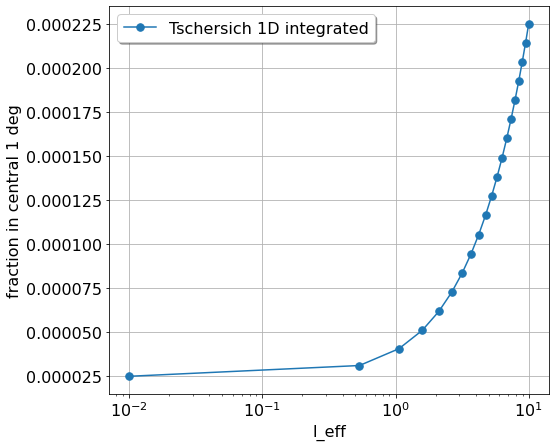

In [27]:
fig = plt.figure(0, figsize=(8,6.5))
ax1=plt.gca()

ax1.plot(l_eff_list , np.array(fraction_old_1D_list),
          ".", ls = "-",label = "Tschersich 1D integrated",
         ms = 15)

# ax1.axhline(1, label =  "1", color = "k")
# ax1.set_ylim([0,1])
ax1.set_xscale('log')
# ax1.set_yscale('log')
ax1.set_xlabel(r"l_eff")
ax1.set_ylabel(r"fraction in central 1 deg")

plt.legend(shadow=True)
plt.tight_layout()
plt.grid(True)

####Approximate opening anlge (3 mmm opening seen at 30 cm)

In [32]:
theta_mass = np.arctan(1.5/300) /degree
theta_mass

fraction_cos = integrate_H_angles_cos(theta_lim = [0,theta_mass*degree] )/integrate_H_angles_cos(
    theta_lim = [0,90*degree] )

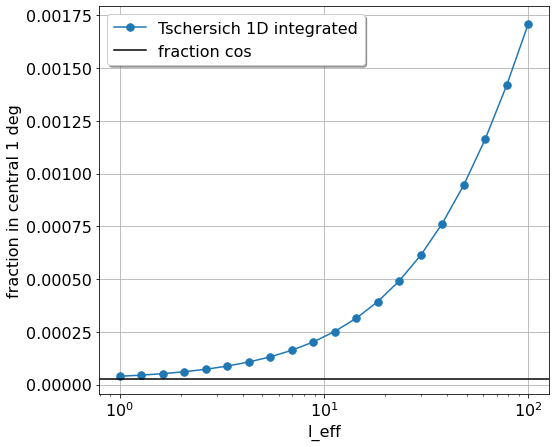

In [33]:
l_eff_list = np.logspace(0,2,num = 20)
fraction_old_1D_list = [integrate_H_angles_1D(l_eff = leff,theta_lim = [0,theta_mass*degree] )
                    /integrate_H_angles_1D(
    l_eff = leff,theta_lim = [0,90*degree] ) for leff in l_eff_list]

fig = plt.figure(0, figsize=(8,6.5))
ax1=plt.gca()

ax1.plot(l_eff_list , np.array(fraction_old_1D_list),
          ".", ls = "-",label = "Tschersich 1D integrated",
         ms = 15)

ax1.axhline(fraction_cos, label =  "fraction cos", color = "k")
# ax1.set_ylim([0,1])
ax1.set_xscale('log')
# ax1.set_yscale('log')
ax1.set_xlabel(r"l_eff")
ax1.set_ylabel(r"fraction in central 1 deg")

plt.legend(shadow=True)
plt.tight_layout()
plt.grid(True)

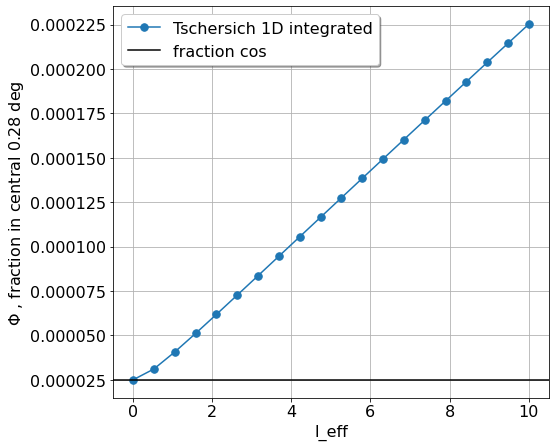

: 

In [39]:
l_eff_list = np.linspace(0.01,10,num = 20)
fraction_old_1D_list = [integrate_H_angles_1D(l_eff = leff,theta_lim = [0,theta_mass*degree] )
                    /integrate_H_angles_1D(
    l_eff = leff,theta_lim = [0,90*degree] ) for leff in l_eff_list]

fig = plt.figure(0, figsize=(8,6.5))
ax1=plt.gca()

ax1.plot(l_eff_list , np.array(fraction_old_1D_list),
          ".", ls = "-",label = "Tschersich 1D integrated",
         ms = 15)

ax1.axhline(fraction_cos, label =  "fraction cos", color = "k")
# ax1.set_ylim([0,1])
# ax1.set_xscale('log')
# ax1.set_yscale('log')
ax1.set_xlabel(r"l_eff")
ax1.set_ylabel(r"$\Phi$ , fraction in central 0.28 deg")

plt.legend(shadow=True)
plt.tight_layout()
plt.grid(True)

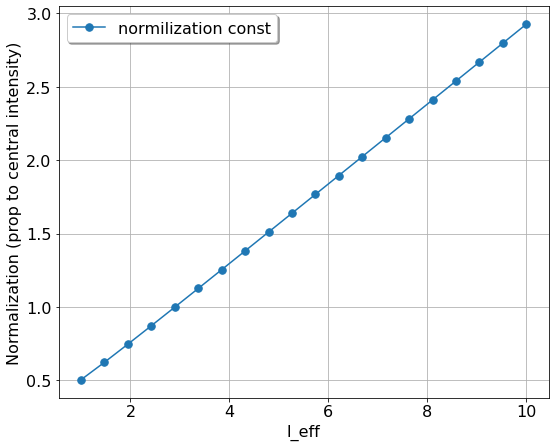

In [25]:
l_eff_list = np.linspace(1,10,num = 20)
total_old_1D_list = [1/integrate_H_angles_1D(
    l_eff = leff,theta_lim = [0,90*degree] ) for leff in l_eff_list]

fig = plt.figure(0, figsize=(8,6.5))
ax1=plt.gca()

ax1.plot(l_eff_list , np.array(total_old_1D_list),
          ".", ls = "-",label = "normilization const",
         ms = 15)

# ax1.axhline(1, label =  "1", color = "k")
# ax1.set_ylim([0,1])
# ax1.set_xscale('log')
# ax1.set_yscale('log')
ax1.set_xlabel(r"l_eff")
ax1.set_ylabel(r"Normalization (prop to central intensity)")

plt.legend(shadow=True)
plt.tight_layout()
plt.grid(True)

# Calculate l_eff = 2.75 +-0.25

In [35]:
fraction_list = [integrate_H_angles_1D(l_eff = leff,
                        theta_lim = [0,theta_mass*degree] )
                    /integrate_H_angles_1D(
    l_eff = leff,theta_lim = [0,90*degree] ) for leff in [2.5,2.75,3]]

fraction_list

[6.983502511213596e-05, 7.502013038545562e-05, 8.02167368453089e-05]

In [37]:
np.array(fraction_list) - fraction_list[1]

array([-5.18510527e-06,  0.00000000e+00,  5.19660646e-06])

In [38]:
(np.array(fraction_list) - fraction_list[1])/fraction_list[1]

array([-0.06911619,  0.        ,  0.06926949])